<h1 align="center"><font size="5">Capstone Project</font></h1>

### Prediction of Road Accident Severity in Rainy Weather
The goal of this project is to predict the severity of road accidents in rainy weather due to various conditions. This will help the community to stay safe and avoid damage or loss due to accidents in rainy weather. This will also help the Road Safety team to take necessary precautions.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore') 

In [4]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Data Understanding
By analysing the raw data, the following conclusion can be done.
1. Severity code is the target parameter or predictor variable which as it shows the severity of the accidents.
2. Data clean up is required as few columns are not required for analysis.
3. Since the goal is to get predictions for rainy weather, only rows corresponding to ‘Rainy’ Weather can be used.
4. ROADCOND and LIGHTCOND are different categories that can be derived from the Weather column.
5. Convert raw unbalanced data to balanced dataset.

In [5]:
#download csv file containing data
!wget -O data_collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-09-02 08:24:25--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘data_collisions.csv’

100%[======================================>] 73,917,638  36.2MB/s   in 1.9s   

2020-09-02 08:24:28 (36.2 MB/s) - ‘data_collisions.csv’ saved [73917638/73917638]



In [6]:
#create a dataframe using csv file
df = pd.read_csv('data_collisions.csv')
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
#Plotting weather data vs total number of cases
plot_df = df.groupby(["WEATHER"]).count().sort_values(["SEVERITYCODE"],ascending=False).rename(columns={"SEVERITYCODE" : "Total Cases"}).reset_index()
plot_df.head()

,WEATHER,Total Cases,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,Clear,111135,108959,108959,111135,111135,111135,111135,111135,110626,...,111116,111027,2820,65582,4111,111130,111129,111135,111135,111135
1,Raining,33145,32015,32015,33145,33145,33145,33145,33145,33004,...,33141,33121,1002,20472,3280,33138,33138,33145,33145,33145
2,Overcast,27714,27136,27136,27714,27714,27714,27714,27714,27584,...,27702,27693,680,17347,1557,27708,27708,27714,27714,27714
3,Unknown,15091,13893,13893,15091,15091,15091,15091,15091,14107,...,15080,15046,124,9824,98,15091,15089,15091,15091,15091
4,Snowing,907,894,894,907,907,907,907,907,902,...,907,901,10,621,185,907,907,907,907,907


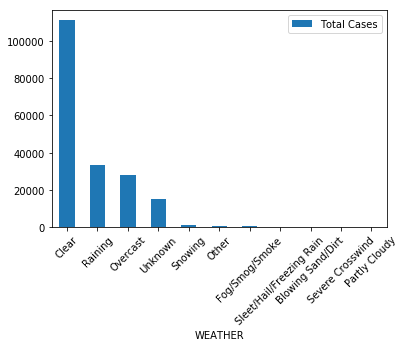

In [8]:
plot_df.plot.bar(x='WEATHER', y='Total Cases', rot=45)

In [9]:
#check severity value counts of initial data
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [10]:
# Clean up data by dropping unwanted columns
dataset = df.drop(columns = ['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'])
dataset.shape

(194673, 4)

In [11]:
#Extract rows corresponding to rainy weather
rain_data = dataset[(dataset['WEATHER'] == 'Raining')].copy()
rain_data.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
1,1,Raining,Wet,Dark - Street Lights On
4,2,Raining,Wet,Daylight
6,1,Raining,Wet,Daylight
12,1,Raining,Wet,Dark - Street Lights On
13,1,Raining,Wet,Dark - No Street Lights


In [12]:
#Print count of rows with severity code 1 and 2
rain_data['SEVERITYCODE'].value_counts()

1    21969
2    11176
Name: SEVERITYCODE, dtype: int64

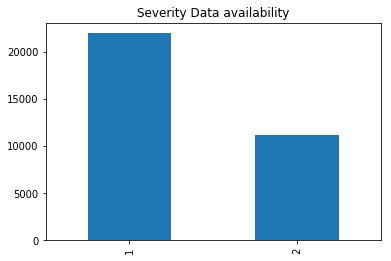

In [13]:
#Plot Raw unbalanced data
severity_unbalanced = rain_data['SEVERITYCODE'].value_counts().plot(kind='bar',title="Severity Data availability")

In [14]:
#Convert column with string values to category
rain_data["WEATHER"] = rain_data["WEATHER"].astype('category')
rain_data["ROADCOND"] = rain_data["ROADCOND"].astype('category')
rain_data["LIGHTCOND"] = rain_data["LIGHTCOND"].astype('category')

#Create columns with category codes
rain_data['CATEGORY_WEATHER'] = rain_data['WEATHER'].astype('category').cat.codes
rain_data['CATEGORY_ROADCOND'] = rain_data['ROADCOND'].astype('category').cat.codes
rain_data['CATEGORY_LIGHTCOND'] = rain_data['LIGHTCOND'].astype('category').cat.codes
rain_data.reset_index().head()

,index,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,CATEGORY_WEATHER,CATEGORY_ROADCOND,CATEGORY_LIGHTCOND
0,1,1,Raining,Wet,Dark - Street Lights On,0,8,2
1,4,2,Raining,Wet,Daylight,0,8,5
2,6,1,Raining,Wet,Daylight,0,8,5
3,12,1,Raining,Wet,Dark - Street Lights On,0,8,2
4,13,1,Raining,Wet,Dark - No Street Lights,0,8,0


In [15]:
from sklearn.utils import resample
#Majority class downsampling
rain_data_adjusted = resample(rain_data[rain_data.SEVERITYCODE==1],replace=False,
                              n_samples=11176,random_state=123)
# combining downsampled majority class with minority class
rain_data_balanced = pd.concat([rain_data_adjusted, rain_data[rain_data.SEVERITYCODE==2]])
rain_data_balanced.SEVERITYCODE.value_counts()

2    11176
1    11176
Name: SEVERITYCODE, dtype: int64

In [16]:
#Print count of rows with severity code 1 and 2 after downsampling
rain_data_balanced.SEVERITYCODE.value_counts()

2    11176
1    11176
Name: SEVERITYCODE, dtype: int64

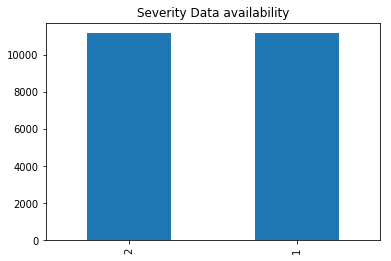

In [17]:
#Plot balanced data
severity_balanced = rain_data_balanced['SEVERITYCODE'].value_counts().plot(kind='bar',title="Severity Data availability")

In [47]:
#define X
import numpy as np
X=np.asarray(rain_data_balanced[['CATEGORY_ROADCOND','CATEGORY_LIGHTCOND']])
X[0:5]

array([[8, 2],
       [8, 5],
       [8, 5],
       [8, 6],
       [8, 5]], dtype=int8)

In [48]:
#define Y
y=np.asarray(rain_data_balanced[['SEVERITYCODE']])
y[0:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [49]:
#Standardising the data set using scikit-learn
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.15600865, -1.08480647],
       [ 0.15600865,  0.75780923],
       [ 0.15600865,  0.75780923],
       [ 0.15600865,  1.37201447],
       [ 0.15600865,  0.75780923]])

In [50]:
#Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (17881, 2) (17881, 1)
Test set: (4471, 2) (4471, 1)


### KNN

In [51]:
#K Nearest neighbour modelling
from sklearn.neighbors import KNeighborsClassifier
k=15
#Steps to train the model and predict  
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
yhatKn = neigh.predict(X_test)
yhatKn[0:5]

array([2, 2, 2, 2, 2])

In [52]:
from sklearn import metrics
print('Train set accuracy', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test set accuracy', metrics.accuracy_score(y_test, yhatKn))

Train set accuracy 0.5076897265253622
Test set accuracy 0.5155446208901812


In [53]:
#Get the best K
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatKn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatKn)
    std_acc[n-1]=np.std(yhatKn==y_test)/np.sqrt(yhatKn.shape[0])
mean_acc

array([0.48848132, 0.48937598, 0.48870499, 0.48892865, 0.48691568,
       0.48825766, 0.48736301, 0.48959964, 0.48781033, 0.48691568,
       0.48669202, 0.48646835, 0.48781033, 0.48848132, 0.51554462,
       0.49138895, 0.49228361, 0.48713934, 0.49004697, 0.48937598,
       0.48713934, 0.48937598, 0.48736301, 0.48915231, 0.48937598,
       0.49183628, 0.48959964, 0.48959964, 0.48959964])

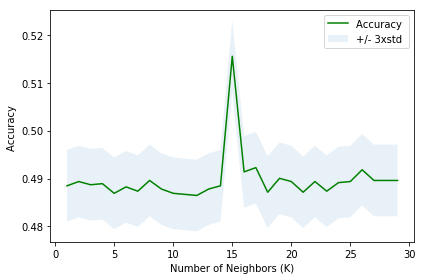

The best accuracy was with 0.5155446208901812 with k= 15


In [54]:
#plotting the graph
import matplotlib.pyplot as plt
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [55]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_similarity_score
knn_f1 = f1_score(y_test, yhatKn, average='weighted')
knn_jaccard = jaccard_similarity_score(y_test, yhatKn)
print('KNN F1 score is ' + str(knn_f1))
print('KNN jaccard similarity score is ' + str(knn_jaccard))
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

KNN F1 score is 0.4863389808653002
KNN jaccard similarity score is 0.4895996421382241
The best accuracy was with 0.5155446208901812 with k= 15


### Decision tress

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [59]:
depth = 12
dTree = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
dTree.fit(X_train,y_train)
yhatD = dTree.predict(X_test)
print(yhatD[0:5])
print("Accuracy:",metrics.accuracy_score(y_test, yhatD))

[1 1 2 1 1]
Accuracy: 0.5157682845001118


In [60]:
dtree_f1 = f1_score(y_test, yhatD)
dtree_jaccard = jaccard_similarity_score(y_test, yhatD)
print('F1 score is ' + str(dtree_f1))
print('jaccard similarity score is ' + str(dtree_jaccard))
print('Most accurate max depth',depth)

F1 score is 0.48341684562157006
jaccard similarity score is 0.5157682845001118
Most accurate max depth 12


### Linear regression model

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn import datasets, linear_model, metrics 
LR = LogisticRegression(C=7, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=7, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [62]:
# Train Model & Predict
LRyhat = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
# Linear Regression Jaccard Similarity Score
linreg_f1 = f1_score(y_test,LRyhat)
linreg_jaccard = jaccard_similarity_score(y_test, LRyhat)
logloss = log_loss(y_test, yhat_prob)
print('F1 score of Linear regression model', linreg_f1)
print('Jaccard similarity score ofl Linear regression model', linreg_jaccard)
print('Log loss of Linear Regression model', logloss)

F1 score of Linear regression model 0.480209823557463
Jaccard similarity score ofl Linear regression model 0.5124133303511519
Log loss of Linear Regression model 0.6931303623342485


### Model Evaluation using Test set

In [63]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [64]:
# KNN Jaccard Similarity Score and F1 score
print('K nearest neighbor Jaccard Similarity Score', knn_jaccard)
print('K nearest neighbor F1 Score', knn_f1)

K nearest neighbor Jaccard Similarity Score 0.4895996421382241
K nearest neighbor F1 Score 0.4863389808653002


In [65]:
# Decision tree Jaccard Similarity Score
print('Decision tree Jaccard Similarity Score', dtree_jaccard)
# Decision tree F1 Score
print('Decision tree F1 Score', dtree_f1)

Decision tree Jaccard Similarity Score 0.5157682845001118
Decision tree F1 Score 0.48341684562157006


In [66]:
# Linear Regression Jaccard Similarity Score
print('Linear Regression Jaccard Similarity Score', linreg_jaccard)
# Linear Regression F1 Score
print('Linear Regression F1 Score', linreg_f1)
#log loss
print('Log loss', logloss)

Linear Regression Jaccard Similarity Score 0.5124133303511519
Linear Regression F1 Score 0.480209823557463
Log loss 0.6931303623342485


### Report

In [67]:
f1_scores = [knn_f1, dtree_f1, linreg_f1]
jaccard_scores = [knn_jaccard,dtree_jaccard,linreg_jaccard]
algorithms = ['KNN', 'Decision Tree', 'Linear Regression']
table_data = {'Algorithms': algorithms, 'F1 scores': f1_scores, 'Jaccard Scores': jaccard_scores, 'Log loss': ['NA','NA',logloss]}
table_df = pd.DataFrame(table_data)
table_df

,Algorithms,F1 scores,Jaccard Scores,Log loss
0,KNN,0.486339,0.489600,NA
1,Decision Tree,0.483417,0.515768,NA
2,Linear Regression,0.480210,0.512413,0.69313
